# Lesson 4. Collab Filtering 

## MovieLens Sample Data

#### Env. Setup

In [1]:
from fastai.collab import *
from fastai.tabular import *

#### Import Data

In [2]:
path = untar_data(URLs.ML_SAMPLE) #movielens data
path

PosixPath('/home/jupyter/.fastai/data/movie_lens_sample')

In [3]:
df = pd.read_csv(path/'ratings.csv')

In [4]:
df.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


In [5]:
df.shape

(6031, 4)

#### Train Data

In [6]:
data = CollabDataBunch.from_df(df, seed = 42)

In [7]:
y_range = [0,5.5] #min rating=0, max rating = 5

In [8]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


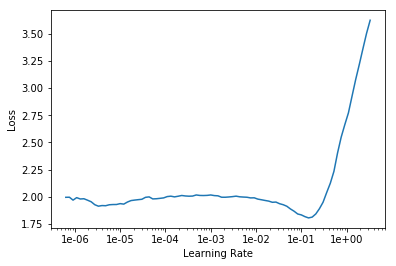

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,1.596831,0.872422,00:00
1,0.868987,0.692635,00:00
2,0.618468,0.642901,00:00
3,0.451749,0.627375,00:00
4,0.355211,0.625786,00:00


In [12]:
learn.save('first-collab')

In [13]:
learn.load('first-collab')

CollabLearner(data=TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 73; movieId 1097; ,userId 561; movieId 924; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; 
y: FloatList
4.0,3.5,3.5,5.0,2.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 306; movieId 2628; ,userId 605; movieId 3793; ,userId 313; movieId 4886; ,userId 468; movieId 1136; ,userId 380; movieId 539; 
y: FloatList
3.0,2.0,4.5,4.0,1.5
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(101, 50)
  (i_weight): Embedding(101, 50)
  (u_bias): Embedding(101, 1)
  (i_bias): Embedding(101, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequent

## MovieLens Latest Small Data

#### Import Data

Movielens 100k data dataset available from http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [71]:
path=Config.data_path()/'movielens'
path

PosixPath('/home/jupyter/.fastai/data/movielens')

In [72]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [73]:
ratings.shape

(100836, 4)

In [74]:
movies = pd.read_csv(path/'movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [75]:
movies.shape

(9742, 3)

In [77]:
#Merge datasets
rating_movie = ratings.merge(movies[['movieId', 'title']])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)


In [65]:
len(rating_movie)

100836

In [66]:
rating_movie.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

#### Train Data

In [42]:
user, movie, title = 'userId', 'movieId', 'title'

In [43]:
data = CollabDataBunch.from_df(rating_movie, seed = 42, valid_pct=0.1, item_name=title)

In [46]:
data.show_batch(10)

userId,title,target
483,Star Wars: Episode I - The Phantom Menace (1999),3.0
312,Eraserhead (1977),4.0
608,"Boondock Saints, The (2000)",4.5
140,"Eagle Has Landed, The (1976)",3.5
187,Three Kings (1999),3.0
233,Pulp Fiction (1994),4.0
438,Nine Months (1995),3.0
32,Willy Wonka & the Chocolate Factory (1971),5.0
182,Better Off Dead... (1985),2.5
50,"Hail, Caesar! (2016)",2.0


In [47]:
y_range = [0, 5.5]

In [48]:
learn = collab_learner(data, n_factors=50, y_range=y_range, wd = 1e-1) #wd = weight decay

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


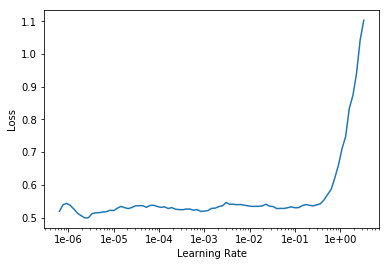

In [57]:
learn.recorder.plot()

In [62]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,0.570162,0.741710,00:06
1,0.496430,0.722813,00:07
2,0.308269,0.726761,00:07


In [103]:
MSE, RMSE = 0.73, np.sqrt(MSE)
print('MSE:',MSE, 'RMSE:', RMSE.round(2))

MSE: 0.73 RMSE: 0.85


In [63]:
learn.save('collab')

#### The End